In [1]:
import sys
sys.path.append('..')

In [2]:
from core.dataset import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'sc'

In [4]:
trip = ['TNF', 'PIC', 'LPS']
sheet_type = 'am'

In [5]:
t1_data = Data(load_dir, trip, sheet_type, merge=True)

In [6]:
X, Y = t1_data.iloc[:, [i for i in range(984)]].to_numpy(), t1_data.iloc[:, [984]].to_numpy().reshape(-1, )

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.1)

In [8]:
model = xgb.XGBClassifier(use_label_encoder=False, tree_method='gpu_hist')

In [9]:
model.fit(X_train, y_train)

[14:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
pred = model.predict(X_val)

In [11]:
cr = classification_report(y_val, pred, target_names=trip)

In [12]:
print(cr)

              precision    recall  f1-score   support

         TNF       0.91      0.86      0.89       160
         PIC       0.87      0.85      0.86       142
         LPS       0.88      0.94      0.91       174

    accuracy                           0.89       476
   macro avg       0.89      0.89      0.89       476
weighted avg       0.89      0.89      0.89       476



In [13]:
t1_feature_importance_rev = model.feature_importances_.argsort()

In [14]:
# sorted in reverse order so need to flip around
t1_feature_importance = t1_feature_importance_rev[::-1]

<AxesSubplot:>

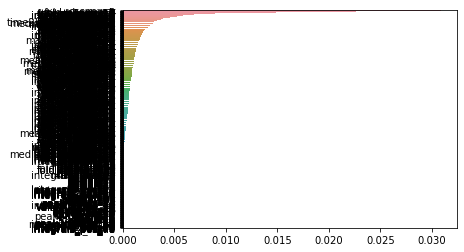

In [15]:
sns.barplot(x=model.feature_importances_[t1_feature_importance], y=t1_data.columns[t1_feature_importance])

In [16]:
t1_data.columns[t1_feature_importance][:20]

Index(['fold_change_5', 'oscpower', 'integrals_pos_8', 'time_series_3',
       'fold_change_24', 'trough2peak_1', 'integrals_17', 'fold_change_20',
       'envelope_5', 'integrals_10', 'integrals_27', 'integrals_38',
       'integrals_9', 'integrals_pos_44', 'integrals_pos_46', 'fold_change_25',
       'time_series_19', 'fold_change_7', 'fold_change_22', 'mean_movvar'],
      dtype='object')

### TNF/PIC/LPS Top Features
* ['integrals_10', 'fold_change_24', 'time_series_3', 'integrals_pos_65',
       'integrals_pos_9', 'integrals_8', 'fold_change_19', 'trough2peak_1',
       'intwin1_2', 'oscpower', 'envelope_5', 'fold_change_25',
       'integrals_pos_44', 'integrals_pos_16', 'fold_change_18',
       'integrals_pos_90', 'fold_change_20', 'derivatives_3', 'mean_movvar',
       'integrals_24']
* integrals, fold change, time series, integrals pos, trough2peak, intwin1, oscpower, envelope, derivatives, mean movvar

In [17]:
trip2 = ['CpG', 'FLA', 'P3K', 'FSL', 'R84']

In [18]:
t2_data = Data(load_dir, trip2, sheet_type, merge=True)

In [19]:
X2, Y2 = t2_data.iloc[:, [i for i in range(984)]].to_numpy(), t2_data.iloc[:, [984]].to_numpy().reshape(-1, )

In [20]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, Y2, test_size=0.1)

In [21]:
model2 = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [22]:
model2.fit(X2_train, y2_train)

[14:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
pred2 = model2.predict(X2_val)

In [24]:
cr2 = classification_report(pred2, y2_val, target_names=trip2)

In [25]:
print(cr2)

              precision    recall  f1-score   support

         CpG       0.65      0.58      0.61       212
         FLA       0.56      0.60      0.58       162
         P3K       0.54      0.59      0.56       131
         FSL       0.62      0.65      0.64       165
         R84       0.88      0.86      0.87       292

    accuracy                           0.68       962
   macro avg       0.65      0.66      0.65       962
weighted avg       0.68      0.68      0.68       962



### Notes
* much stronger accuracies on TNF/LPS/PIC ~ 85%
* weaker accuracies on rest of ligands ~ 65%
* so why does combining them drag the average down to 65%?

In [26]:
t2_fi_rev = model2.feature_importances_.argsort()

In [27]:
t2_fi = t2_fi_rev[::-1]

<AxesSubplot:>

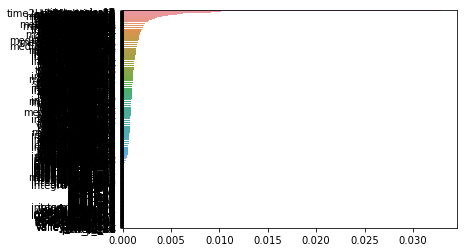

In [29]:
sns.barplot(x=model2.feature_importances_[t2_fi], y=t2_data.columns[t2_fi])

In [28]:
t2_data.columns[t2_fi][:20]

Index(['time_series_2', 'integrals_15', 'fold_change_2', 'derivatives_1',
       'integrals_75', 'time_series_11', 'time2HalfMaxIntegral', 'intwin1_1',
       'integrals_37', 'peak_amps_1', 'integrals_pos_27', 'valley_amps_5',
       'derivatives_3', 'integrals_49', 'integrals_pos_47', 'integrals_pos_93',
       'mean_derivative', 'max_trough2peak', 'valley_amps_6',
       'time_series_85'],
      dtype='object')

### CpG FLA P3K, FLS, R84, FLA
* ['time_series_2', 'integrals_15', 'fold_change_2', 'derivatives_1',
       'integrals_75', 'time_series_11', 'time2HalfMaxIntegral', 'intwin1_1',
       'integrals_37', 'peak_amps_1', 'integrals_pos_27', 'valley_amps_5',
       'derivatives_3', 'integrals_49', 'integrals_pos_47', 'integrals_pos_93',
       'mean_derivative', 'max_trough2peak', 'valley_amps_6',
       'time_series_85']
* time series, integrals, fold_change, derivaties, peak-amps, time2halfmaxintegral, intwin1, valley_amps, derivatives, max trough2peak

<AxesSubplot:>

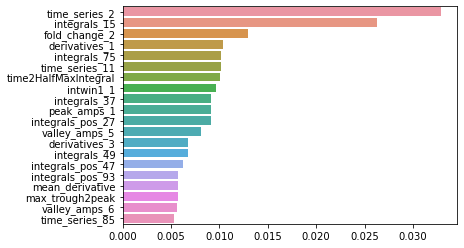

In [30]:
sns.barplot(x=model2.feature_importances_[t2_fi][:20], y=t2_data.columns[t2_fi][:20])

<AxesSubplot:>

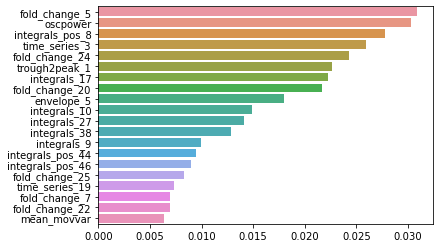

In [35]:
sns.barplot(x=model.feature_importances_[t1_feature_importance][:20], y=t1_data.columns[t1_feature_importance][:20])

# try fitting model on features > 0.02 score
* fit on tier 1 ligands
* fit on tier 2 ligands
* fit on all ligands

In [39]:
point2 = ['time_series_2', 'integrals_15', 'fold_change_5', 'oscpower', 'integrals_pos_8', 'time_series_8', 'fold_change_24', 'trough2peak_1', 'integrals_17', 'fold_change_20']

In [41]:
t1_vec10, t2_vec10 = t1_data.loc[:, point2], t2_data.loc[:, point2]

In [46]:
# use Y and Y2
X1_vec10, X2_vec10 = t1_vec10.to_numpy(), t2_vec10.to_numpy()

In [48]:
X1v_train, X1v_val, y1v_train, y1v_val = train_test_split(X1_vec10, Y, test_size=0.1)

In [49]:
X2v_train, X2v_val, y2v_train, y2v_val = train_test_split(X2_vec10, Y2, test_size=0.1)

In [50]:
v1_model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)
v2_model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [51]:
v1_model.fit(X1v_train, y1v_train)

[15:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [52]:
v2_model.fit(X2v_train, y2v_train)

[15:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
v1pred = v1_model.predict(X1v_val)

In [57]:
v2pred = v2_model.predict(X2v_val)

In [58]:
v1_cr = classification_report(y1v_val, v1pred, target_names=trip)
v2_cr = classification_report(y2v_val, v2pred, target_names=trip2)

In [59]:
print(v1_cr)

              precision    recall  f1-score   support

         TNF       0.82      0.80      0.81       163
         PIC       0.77      0.78      0.77       147
         LPS       0.80      0.82      0.81       166

    accuracy                           0.80       476
   macro avg       0.80      0.80      0.80       476
weighted avg       0.80      0.80      0.80       476



In [60]:
print(v2_cr)

              precision    recall  f1-score   support

         CpG       0.46      0.51      0.48       207
         FLA       0.37      0.37      0.37       137
         P3K       0.56      0.49      0.52       151
         FSL       0.51      0.47      0.49       199
         R84       0.83      0.85      0.84       268

    accuracy                           0.57       962
   macro avg       0.54      0.54      0.54       962
weighted avg       0.57      0.57      0.57       962



## fitting tier1 and tier2 ligands models with top 10 features decreases both accuracies by ~ 10%

In [62]:
# gonna fit a model with full dataset to these features then do more singular model tuning

In [61]:
fulldata = Data(load_dir, ligands, sheet_type, merge=True)

In [64]:
labels = fulldata.iloc[:, [984]].to_numpy().reshape(-1, )

In [65]:
fd_vec10 = fulldata.loc[:, point2]

In [66]:
XX = fd_vec10.to_numpy()

In [67]:
XX_train, XX_val, yy_train, yy_val = train_test_split(XX, labels, test_size=0.1)

In [68]:
fullmodel = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [69]:
fullmodel.fit(XX_train, yy_train)

[15:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [70]:
fullpred = fullmodel.predict(XX_val)

In [71]:
fullcr = classification_report(yy_val, fullpred, target_names=ligands)
print(fullcr)

              precision    recall  f1-score   support

         CpG       0.36      0.37      0.37       201
         FLA       0.25      0.21      0.23       140
         FSL       0.42      0.39      0.40       203
         LPS       0.48      0.52      0.50       166
         P3K       0.42      0.41      0.42       158
         PIC       0.65      0.66      0.66       119
         R84       0.80      0.84      0.82       291
         TNF       0.51      0.49      0.50       160

    accuracy                           0.51      1438
   macro avg       0.49      0.49      0.49      1438
weighted avg       0.51      0.51      0.51      1438



## pretty abysmal accuracy when fit on these 10 features

In [72]:
point2

['time_series_2',
 'integrals_15',
 'fold_change_5',
 'oscpower',
 'integrals_pos_8',
 'time_series_8',
 'fold_change_24',
 'trough2peak_1',
 'integrals_17',
 'fold_change_20']

<AxesSubplot:>

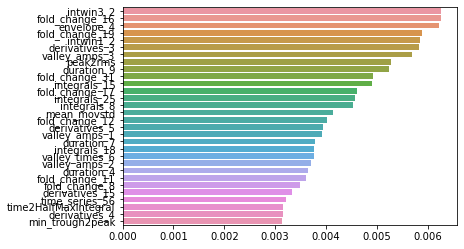

In [74]:
sns.barplot(x=model.feature_importances_[t1_feature_importance][20:50], y=t1_data.columns[t1_feature_importance][20:50])

In [75]:
# i think its less about the specific feature and more about the actual timesteps

In [113]:
a = t1_data.columns[t1_feature_importance][:60]
b = t2_data.columns[t2_fi][:60]

In [114]:
count = 0
k = []
for i in range(len(a)):
    for j in range(len(b)):
        if a[i] == b[j]:
            count += 1
            k.append((a[i], (i, j)))
print(count)

7


In [115]:
k

[('fold_change_5', (0, 45)),
 ('time_series_3', (3, 25)),
 ('derivatives_3', (25, 12)),
 ('peak2rms', (27, 34)),
 ('integrals_15', (30, 1)),
 ('time2HalfMaxIntegral', (47, 6)),
 ('derivatives_2', (57, 22))]

## try fitting on these features?

In [5]:
f = ['fold_change_5', 'time_series_3', 'derivatives_3', 'peak2rms', 'integrals_15', 'derivatives_2']

In [6]:
data = Data(load_dir, ligands, sheet_type, merge=True)

In [7]:
X = data.loc[:, f].to_numpy()

In [8]:
Y = data.iloc[:, [984]].to_numpy().reshape(-1, )

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.1)

In [11]:
model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [12]:
model.fit(X_train, y_train)

[16:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [15]:
pred = model.predict(X_val)

In [16]:
cr = classification_report(y_val, pred, target_names=ligands)

In [17]:
print(cr)

              precision    recall  f1-score   support

         CpG       0.34      0.46      0.39       182
         FLA       0.42      0.28      0.33       167
         FSL       0.47      0.37      0.42       201
         LPS       0.41      0.43      0.42       175
         P3K       0.53      0.46      0.49       155
         PIC       0.54      0.68      0.60       141
         R84       0.79      0.81      0.80       248
         TNF       0.59      0.59      0.59       169

    accuracy                           0.52      1438
   macro avg       0.51      0.51      0.51      1438
weighted avg       0.52      0.52      0.52      1438

